In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import plotting_tools as pt
import scipy.stats as stats

from scipy import interpolate

%matplotlib inline

# this notebook is looking at how the final selection compares to the MGS in each band pass
# 0 spec.z, 
# 1 galex.fuv_mag, 
# 2 galex.nuv_mag, 
# 3 sdss.modelMag_u, 
# 4 sdss.modelMag_g,
# 5 sdss.modelMag_r,
# 6 sdss.modelMag_i,
# 7 sdss.modelMag_z
# 8 ukidss.yPetroMag, 
# 9 ukidss.j_1PetroMag,
# 10 ukidss.hPetroMag,
# 11 ukidss.kPetroMag,
# 12 wise.w1mpro ,  
# 13 wise.w2mpro , 


def kernel_density_estimation(x,y):
    xmin = np.min(x)
    xmax = np.max(x)
    ymin = np.min(y)
    ymax = np.max(y)
    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    return xx,yy,f

In [2]:
galaxies = np.load('/home/calum/Documents/Mphys_data/mgs_multiwavelength/less_strict_abs_sample.npy')
galaxies.shape

(61198, 14)

In [3]:
names = ['FUV','NUV','u','g','r','i','z','Y','J','H','K','W1','W2']

In [4]:
rgalaxies = [row for row in galaxies if 0.1>row[0]>0.004 and row[2]>-999 and row[3]>-999 and row[4]>-999 and row[5]>-999 and row[6]>-999 and row[7]>-999]
np.array(rgalaxies).shape

(31214, 14)

In [5]:
#plt.figure(figsize=(20,80))
colrow= [2,5]

x = [row[colrow[1]] for row in rgalaxies]
y = [row[colrow[0]]-row[colrow[1]] for row in rgalaxies]  
xx,yy,f = kernel_density_estimation(x,y)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 8 Text yticklabel objects>)

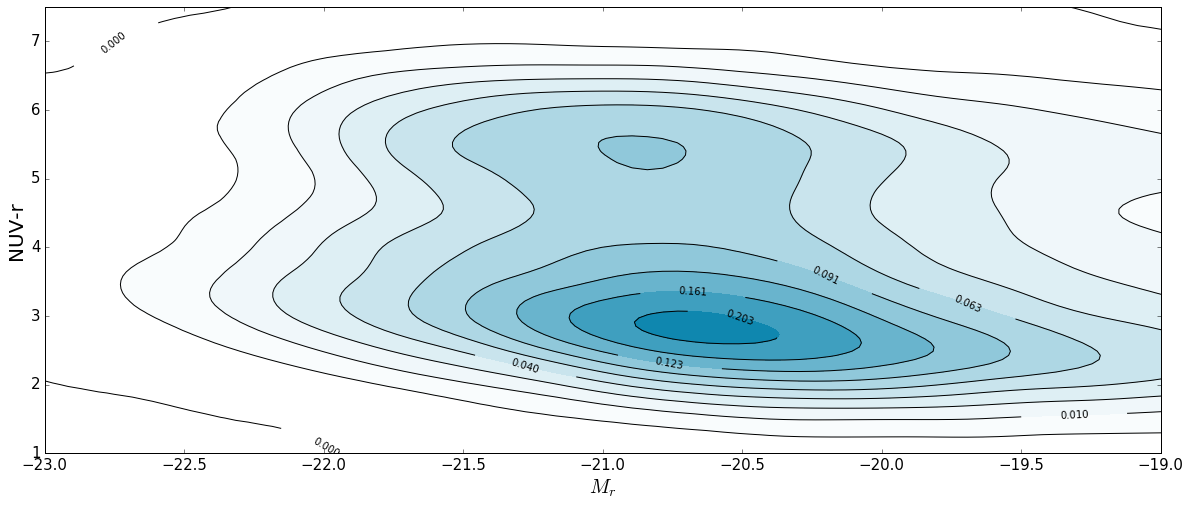

In [6]:
colrow= [2,5]

fig = plt.figure(figsize=(20,8))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel('$M_{r}$',fontsize =20)
ax.set_ylim(1,7.5)
ax.set_xlim(-23,-19)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [7]:
#plt.figure(figsize=(20,80))
colrow= [3,6]

newx = [row[colrow[1]] for row in rgalaxies]
newy = [row[colrow[0]]-row[colrow[1]] for row in rgalaxies]  
newxx,newyy,newf = kernel_density_estimation(newx,newy)

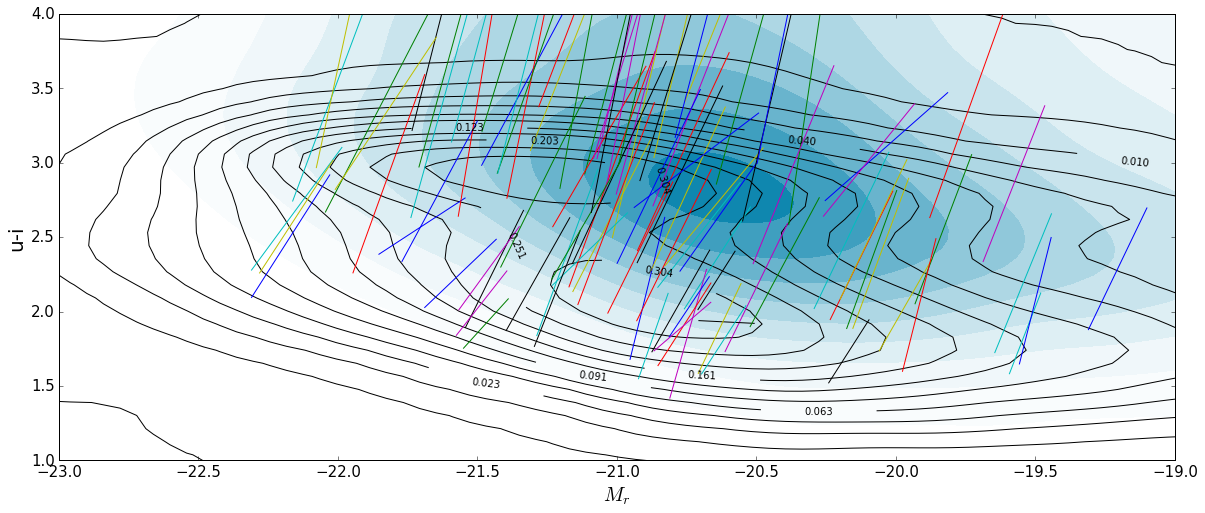

In [8]:
colrow= [3,6]

fig = plt.figure(figsize=(20,8))
ax = fig.gca()
# Contourf plot
cfset = ax.contourf(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(newxx, newyy, newf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel(label,fontsize=20)
ax.set_xlabel('$M_{r}$',fontsize =20)
ax.set_ylim(1,4)
ax.set_xlim(-23,-19)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for i in range(5000,5100):
    plt.plot([x[i],newx[i]],[y[i],newy[i]])

In [9]:
#plt.figure(figsize=(20,80))
colrow= [4,7]

newnewx = [row[colrow[1]] for row in rgalaxies]
newnewy = [row[colrow[0]]-row[colrow[1]] for row in rgalaxies]  
newnewxx,newnewyy,newnewf = kernel_density_estimation(newnewx,newnewy)

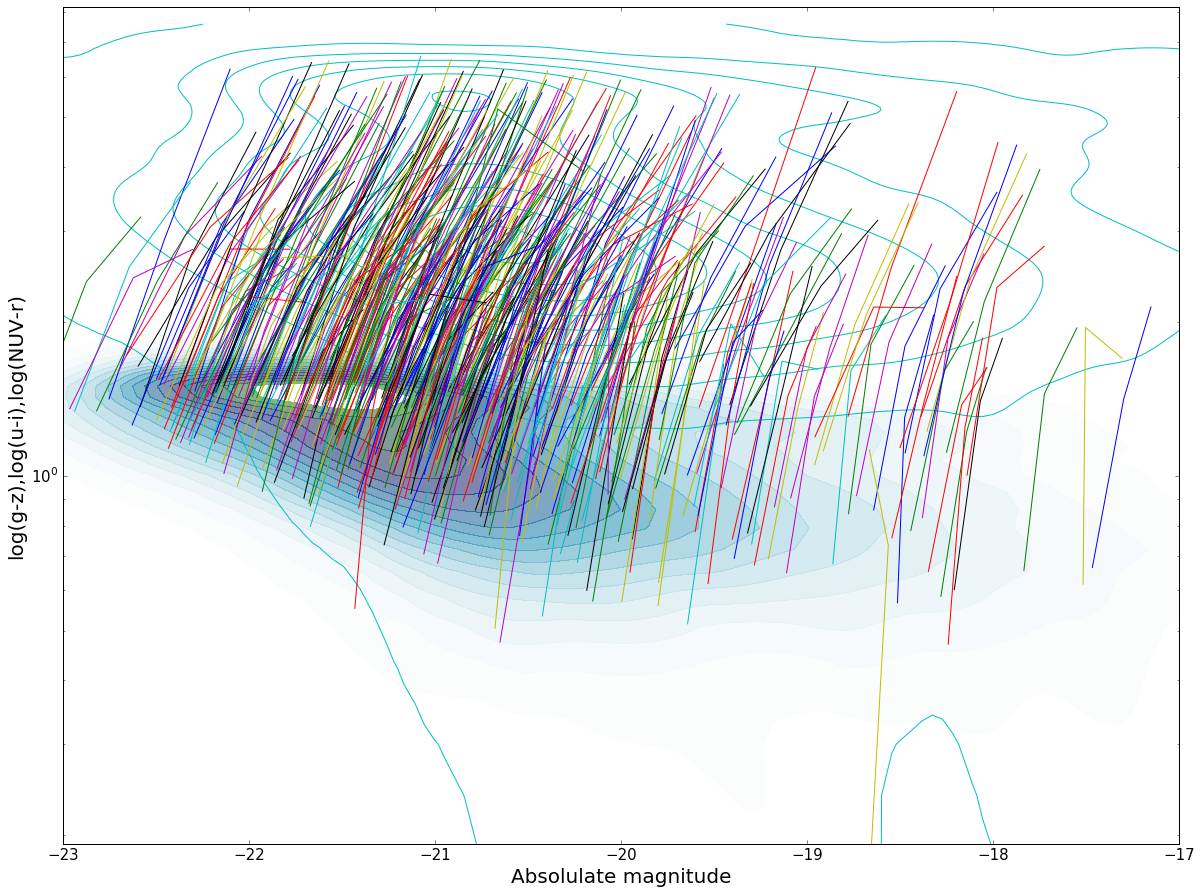

In [10]:
colrow= [4,7]

fig = plt.figure(figsize=(20,15))
ax = fig.gca()
# Contourf plot
cfset = ax.contour(xx, yy, f,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='c',alpha=.99)
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

#cset = ax.contour(newxx, newyy, newf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=.2)
#cset = ax.contour(newnewxx, newnewyy, newnewf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], colors='k',alpha=1.)
cfset = ax.contourf(newnewxx, newnewyy, newnewf,levels=[np.power(x,2) for x in np.arange(0.001,0.9,0.05)], cmap='ocean_r',alpha=0.5)

# Label plot
ax.clabel(cset, inline=1, fontsize=10)
label = names[colrow[0]-1]+'-'+names[colrow[1]-1]
ax.set_ylabel('log(g-z),log(u-i),log(NUV-r)',fontsize=20)
ax.set_xlabel('Absolulate magnitude',fontsize =20)
#ax.set_ylim(0,11)
ax.set_xlim(-23,-17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.yscale('log')

for i in range(5500,6000):
    plt.plot([x[i],newx[i],newnewx[i]],[y[i],newy[i],newnewy[i]])

In [28]:
[x[500],newx[500]],[y[500],newy[500]]

([-17.111490532344959, -17.269473909920833],
 [1.340378088876605, 1.340378088876605])

In [29]:
len(newx),len(x)

(31214, 31214)

In [49]:
xpts = [x[200],newx[200],newnewx[200]]
ypts = [y[200],newy[200],newnewy[200]]
tck = interpolate.splrep(xpts, ypts, s=0,k=2)
xptsnew = np.arange(0, 2*np.pi, np.pi/50)
yptsnew = interpolate.splev(xptsnew, tck, der=0)

ValueError: Error on input data

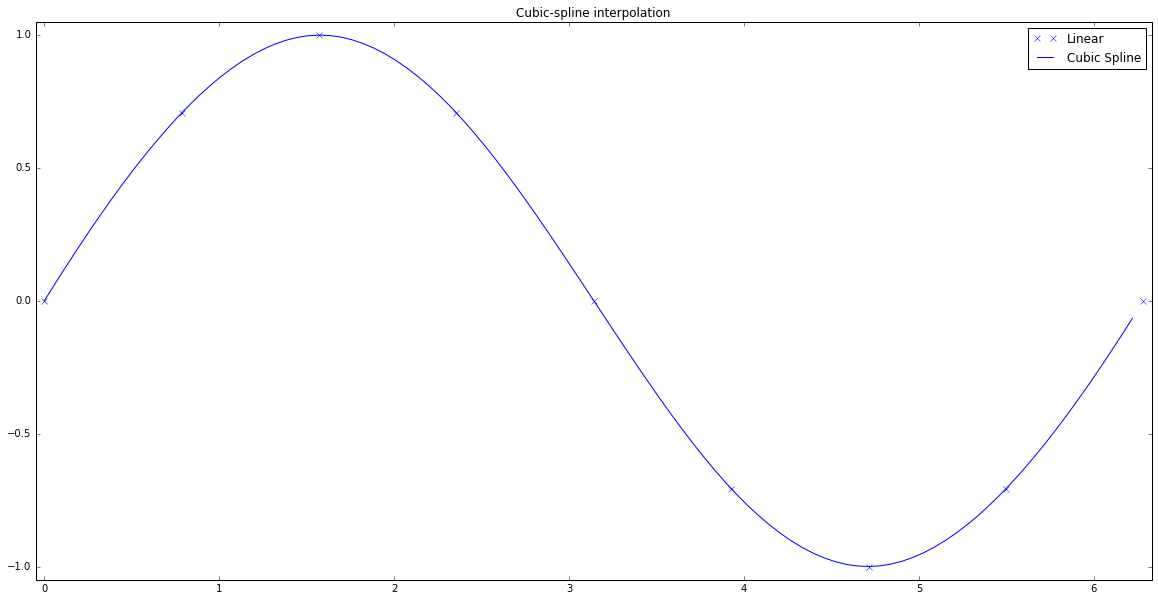

In [46]:
plt.figure(figsize=(20,10))
plt.plot(xpts, ypts, 'x', xptsnew, yptsnew, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()